In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn import metrics
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
heart= pd.read_csv('heart.csv')


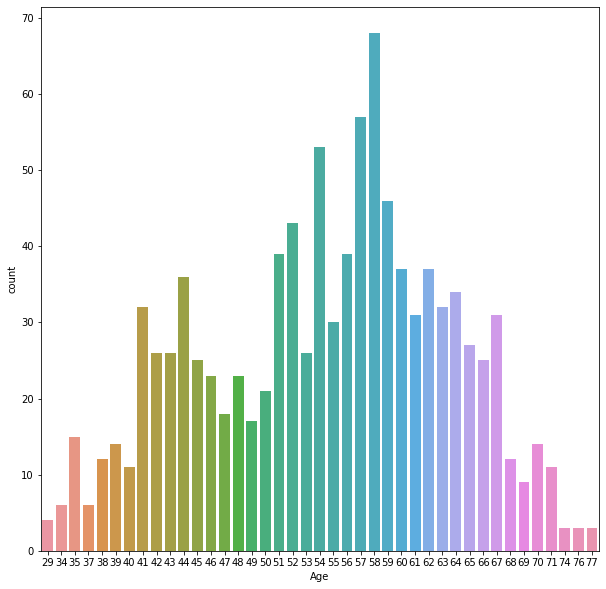

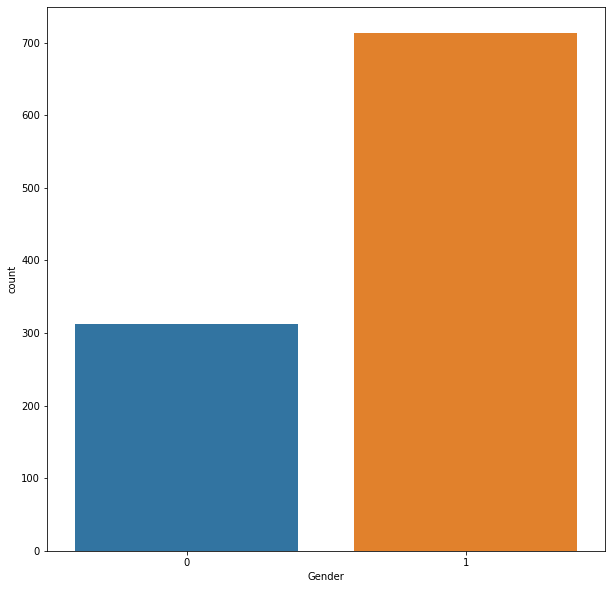

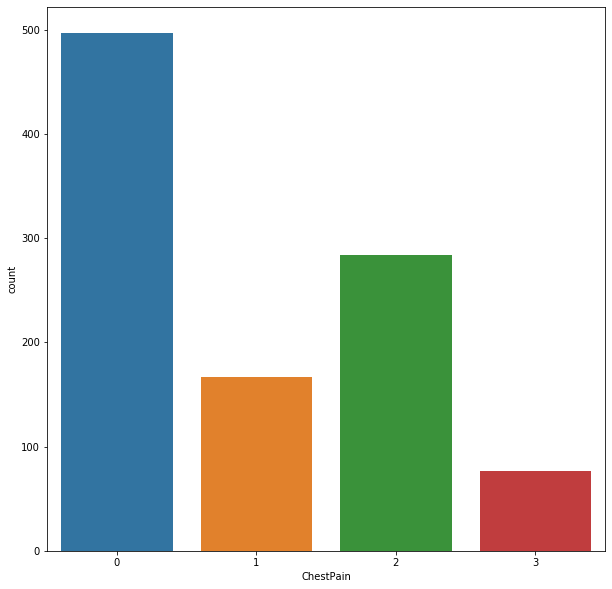

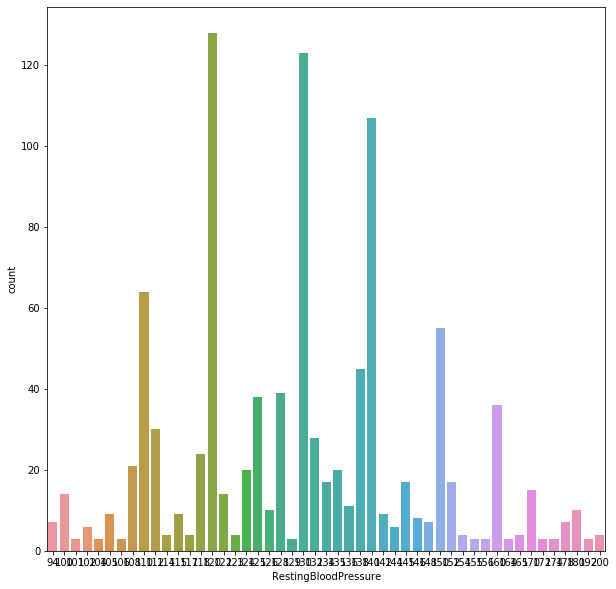

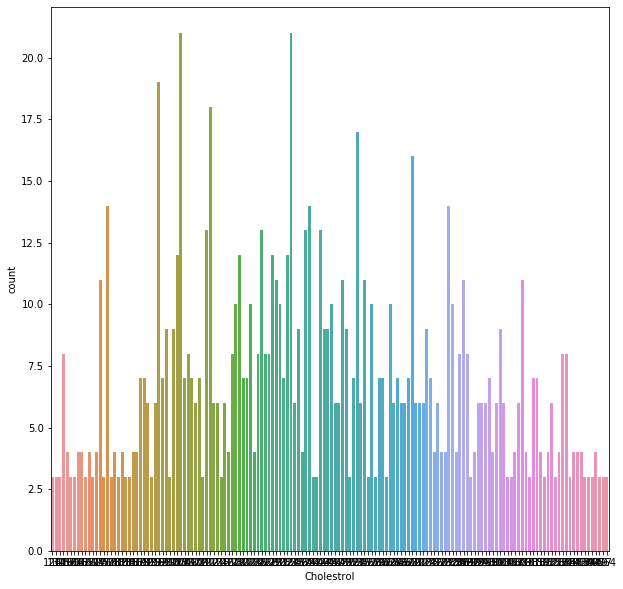

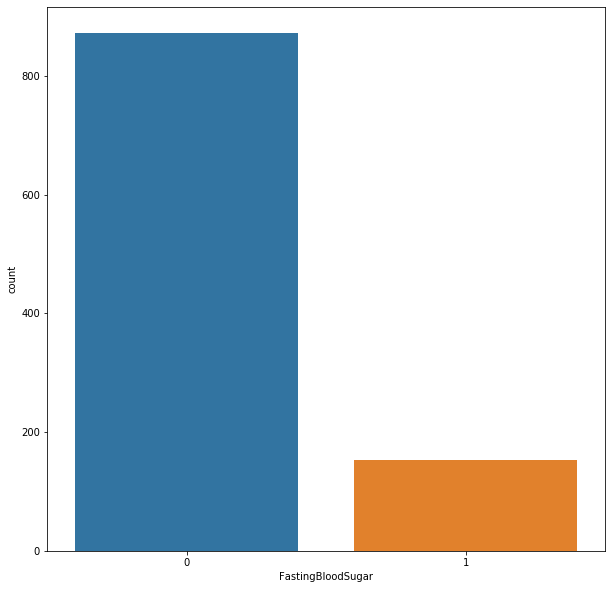

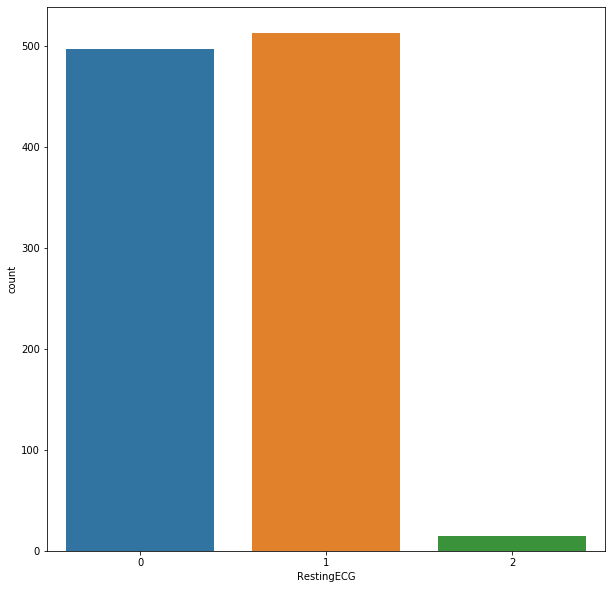

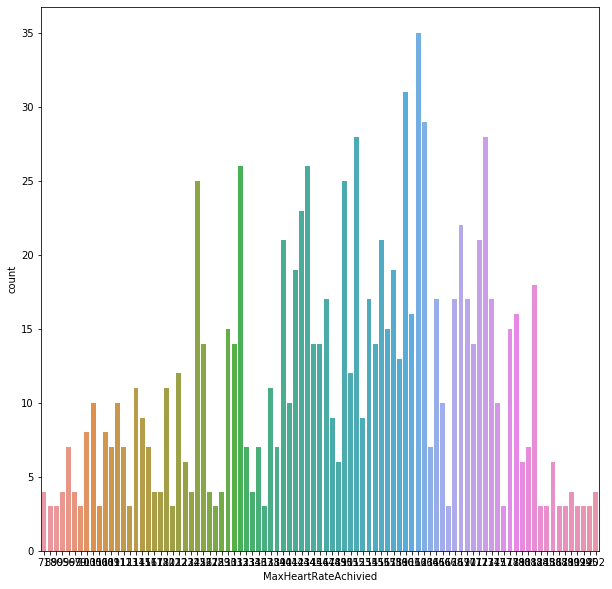

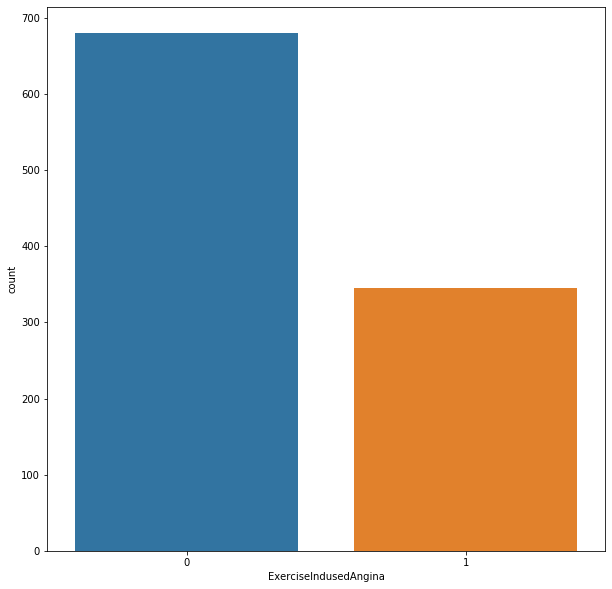

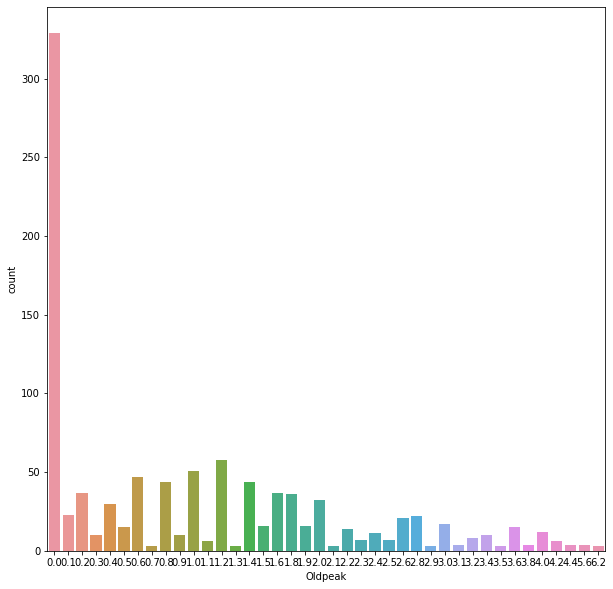

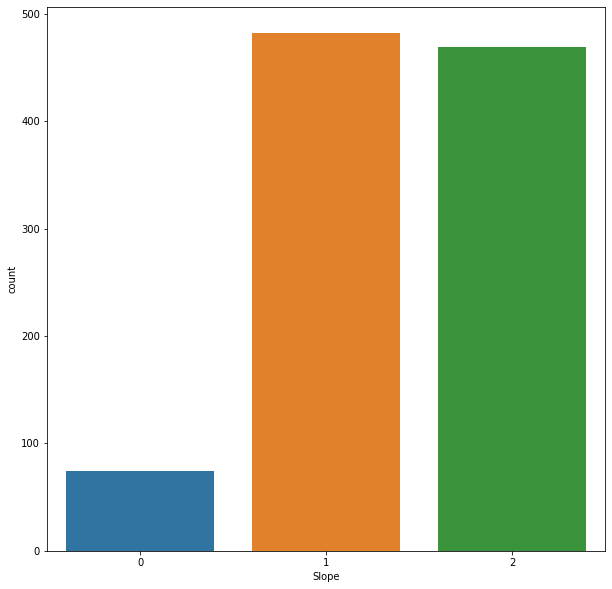

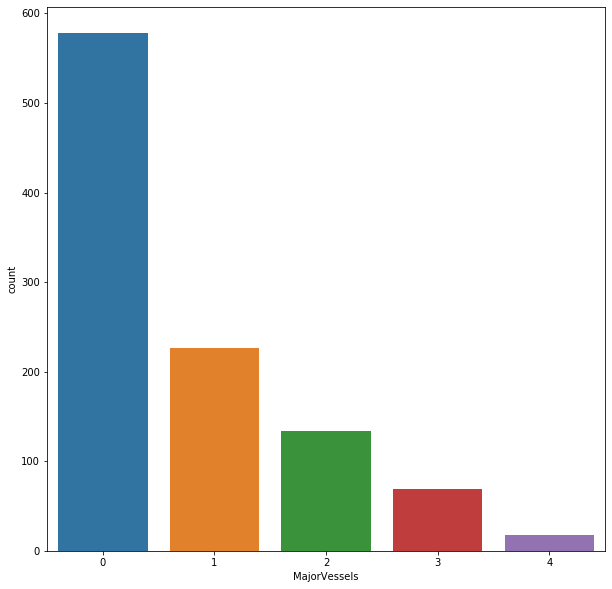

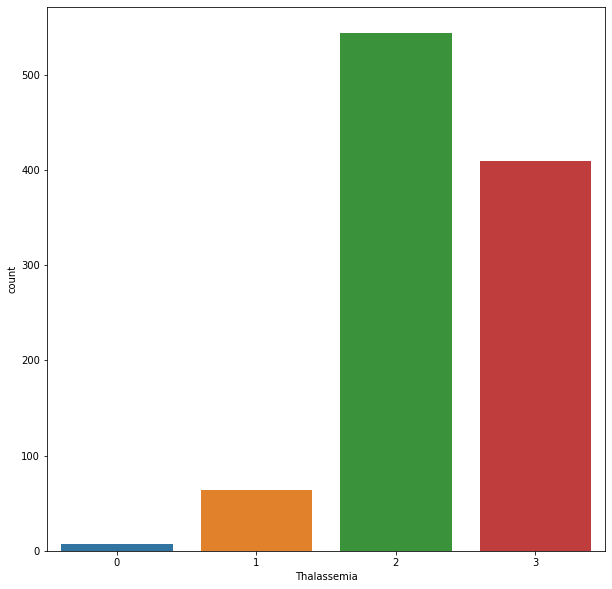

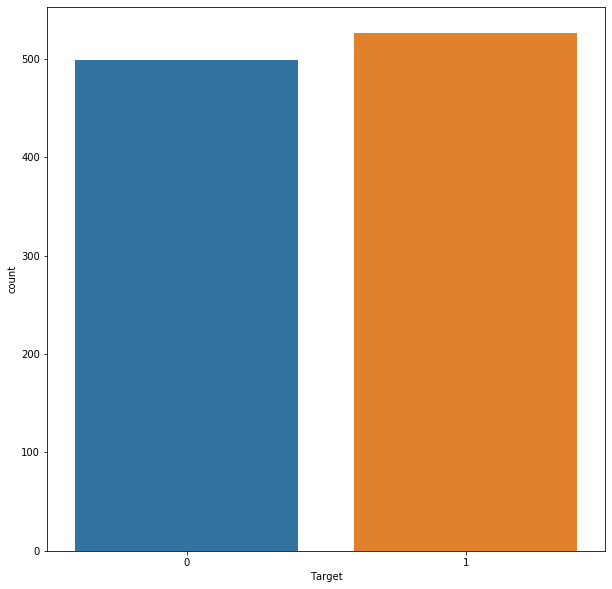

<Figure size 720x720 with 0 Axes>

In [7]:
# our goal is to try understand the data we got lets start 
# here we can see the info of each attribute  in the heart dataframe  as you can see it is not null 
#heart.info()
#we want to know in each coll or"attr" what are the distnguish value we have the counter of differ value 
#print(heart.nunique())
#''' as you  '''
#let us rename the colm we  have to be more understandable 
heart.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']

arr=[]
fig=plt.figure(figsize=(10, 10))

for i in heart:
    ax=sns.countplot(x=i,data=heart)
    fig=plt.figure(figsize=(10, 10))


In [ ]:

# this is the data plot of all the attrr counter of each value in attr 
import itertools
# columns=heart.columns[:14]
# plt.subplots(figsize=(28,25))
# length=len(columns)
# for i,j in itertools.zip_longest(columns,range(length)):
#     plt.subplot((length/2),3,j+1)
#     plt.subplots_adjust(wspace=0.2,hspace=0.5)
#     heart[i].hist(bins=20,edgecolor='black')
#     plt.title(i)
# # plt.clf()

# plt.savefig('new_plot/count')

# plt.show()
########################################

# this is the data plot of all the attrr counter of each value in attr 

# print("hssi")
# columns=heart.columns[:14]
# plt.subplots(figsize=(28,25))
# length=len(columns)
# for i,j in itertools.zip_longest(columns,range(length)):
#     plt.subplot((length/2),3,j+1)
#     plt.subplots_adjust(wspace=0.2,hspace=0.5)
#     ax=sns.swarmplot(heart[i] )
# #     plt.plot(ax)
# #     heart[i].hist(bins=20,edgecolor='black')
#     plt.title(i)
# # plt.clf()

# plt.savefig('new_plot/ss')

# plt.show()

sns.heatmap(heart[heart.columns[:13]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.suptitle('Correlation Matrix')
plt.savefig('new_plot/correlationofdata')

score:  0.8246753246753247
Error of logstic:   0.17532467532467533


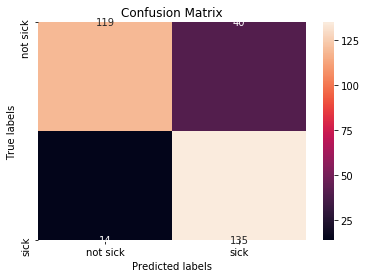


 clasification report:
    Accuracy  F1 score   Recall  Precision
1  0.824675  0.823904  0.90604   0.771429

 clasification report for pair:
               precision    recall  f1-score   support

         0.0       0.89      0.75      0.82       159
         1.0       0.77      0.91      0.83       149

    accuracy                           0.82       308
   macro avg       0.83      0.83      0.82       308
weighted avg       0.84      0.82      0.82       308



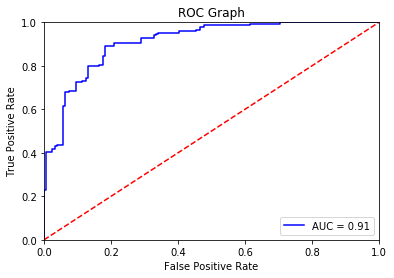

In [11]:

#### lets know split the data we have in order to start the learning procsses 
heart.head()
X_data = heart.drop(columns=['Target'], axis=1)
Y = heart['Target']
#normalize the data
Y = ((Y - np.min(Y))/ (np.max(Y) - np.min(Y))).values
X = ((X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data))).values
# we want here to seprate the data for the learning procsses testdata=30% train 70 %
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)

# let know use two type of classfication algortimm i will first use logstic regression 
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train, y_train)
pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
error_LR=1-score
print("score: ",score)
cmlogstic=confusion_matrix(y_test,pred)
# def result_score_of_model(model,ytest):    
def plot_heat(cm,title): 
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not sick', 'sick']); ax.yaxis.set_ticklabels(['not sick', 'sick']);
    plt.savefig('new_plot/'+title)
    plt.show()
    
print("Error of logstic:  ",error_LR)    
plot_heat(cmlogstic,'logsticheat')
probs = logisticRegr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC Graph')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

################################################3
def get_report(y_test,pred):
    Report = [ (accuracy_score(y_test, pred),f1_score(y_test, pred, average='weighted')
                ,recall_score(y_test, pred), precision_score(y_test, pred))]
    dfObj = pd.DataFrame(Report, columns=['Accuracy', 'F1 score','Recall','Precision'], index=['1'])
    print('\n clasification report:\n', dfObj)   
    print ('\n clasification report for pair:\n', classification_report(y_test,pred))
get_report(y_test,pred)

In [ ]:

# usin svm learning algotrim 
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(x_train,y_train)
#     predsvm=mo.predict(x_test)
    svm_prediction=model.predict(x_test)
    cmsvm=confusion_matrix(y_test,svm_prediction)
    plot_heat(cmsvm,i+' svm')
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(svm_prediction,y_test))
    print("report of ",i)
    get_report(y_test,svm_prediction)